In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


In [181]:
filename1 = '/Users/julianthoenniss/Documents/PhD/data/Fermi_seaFS_Jx=0.499999_Jy=0.5_g=0.0_del_t=0.05_beta=1.0_L=100'
filename2 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.499999_Jy=0.5_g=0.0_del_t=0.1_beta=1.0_L=100'
filename3 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.499999_Jy=0.5_g=0.0mu=0_del_t=1_beta=5.0_L=100'
filename4 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.3_Jy=0.5_g=0.0mu=0_del_t=0.05_beta=5.0_L=100'
filename5 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.3_Jy=0.5_g=0.0mu=0_del_t=1.0_beta=5.0_L=100'

In [182]:
iterator = 10

times = []
time_step = 0
with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    times = data_entr[:,0]
    time_step = int(times[iterator])

print('time step:', time_step)

time step: 16


In [183]:
entangl_spectr_data1 = np.zeros((time_step,8*time_step))
entangl_spectr_data2 = np.zeros((time_step,8*time_step))
entangl_spectr_data3 = np.zeros((time_step,8*time_step))
entangl_spectr_data4 = np.zeros((time_step,8*time_step))
entangl_spectr_data5 = np.zeros((time_step,8*time_step))

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data1[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]

with h5py.File(filename2 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data2[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]
        
with h5py.File(filename3 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data3[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]

with h5py.File(filename4 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data4[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]


with h5py.File(filename5 + '.hdf5', 'r') as f:
    data_entangl = f['entangl_spectr']
    
    for time_cut in range(time_step):
        entangl_spectr_data5[time_cut,4*(time_step - time_cut):4*(time_step + time_cut)] = data_entangl[iterator,time_cut,0:8*time_cut]




In [184]:
data_array1 = np.zeros((time_step,2,8*time_step))
data_array2 = np.zeros((time_step,2,8*time_step))
data_array3 = np.zeros((time_step,2,8*time_step))
data_array4 = np.zeros((time_step,2,8*time_step))
data_array5 = np.zeros((time_step,2,8*time_step))

for time_cut in range (time_step):
    data_array1[time_cut, 0,:] = np.arange(8*time_step)
    data_array1[time_cut, 1,:] = entangl_spectr_data1[time_cut,:8*time_step]
    
    data_array2[time_cut, 0,:] = np.arange(8*time_step)
    data_array2[time_cut, 1,:] = entangl_spectr_data2[time_cut,:8*time_step]
    
    data_array3[time_cut, 0,:] = np.arange(8*time_step)
    data_array3[time_cut, 1,:] = entangl_spectr_data3[time_cut,:8*time_step]
    
    data_array4[time_cut, 0,:] = np.arange(8*time_step)
    data_array4[time_cut, 1,:] = entangl_spectr_data4[time_cut,:8*time_step]
    
    data_array5[time_cut, 0,:] = np.arange(8*time_step)
    data_array5[time_cut, 1,:] = entangl_spectr_data5[time_cut,:8*time_step]
    


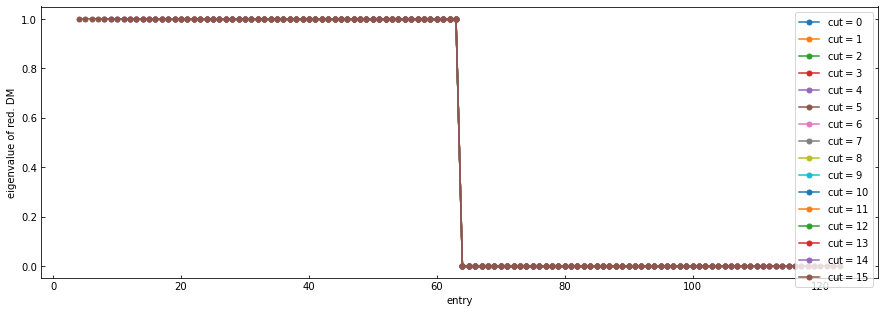

In [167]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')

for time_cut in range(time_step):
    ax.plot( data_array1[time_cut,0,:], zero_to_nan(data_array1[time_cut,1,:]), label='cut'+r'$ = %d$' % time_cut, marker='o', alpha=1, ms=5)

ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

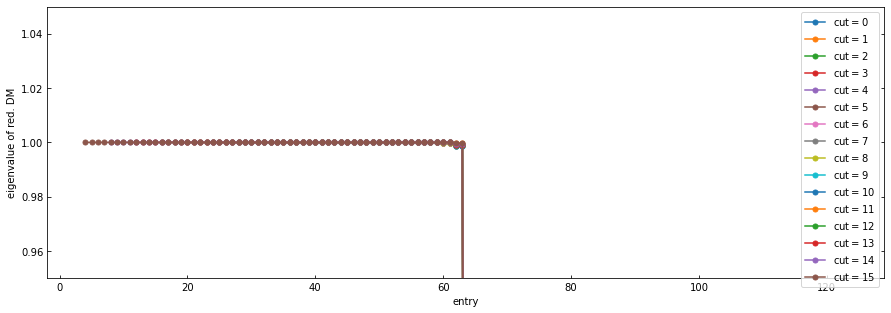

In [188]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')
ax.set_ylim([0.95,1.05])
for time_cut in range(time_step):
    ax.plot( data_array2[time_cut,0,:], zero_to_nan(data_array2[time_cut,1,:]), label='cut'+r'$ = %d$' % time_cut, marker='o', alpha=1, ms=5)
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

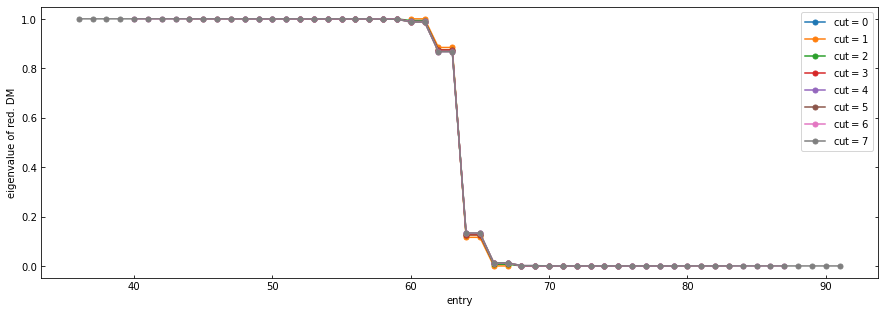

In [186]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')

for time_cut in range(time_step//2):
    ax.plot( data_array3[time_cut,0,:], zero_to_nan(data_array3[time_cut,1,:]), label='cut'+r'$ = %d$' % time_cut, marker='o', alpha=1, ms=5)
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

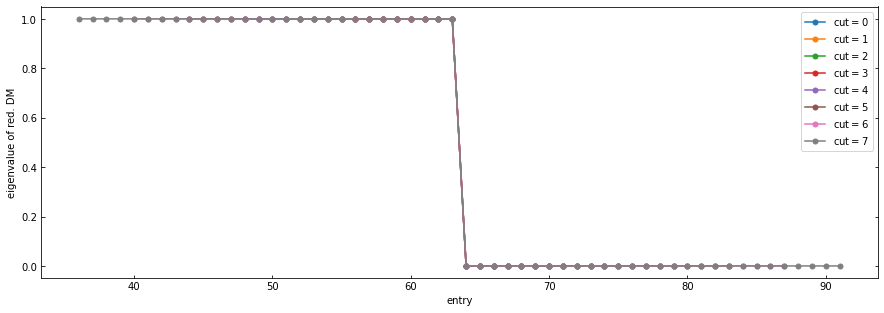

In [180]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')

for time_cut in range(time_step//2):
    ax.plot( data_array4[time_cut,0,:], zero_to_nan(data_array4[time_cut,1,:]), label='cut'+r'$ = %d$' % time_cut, marker='o', alpha=1, ms=5)
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

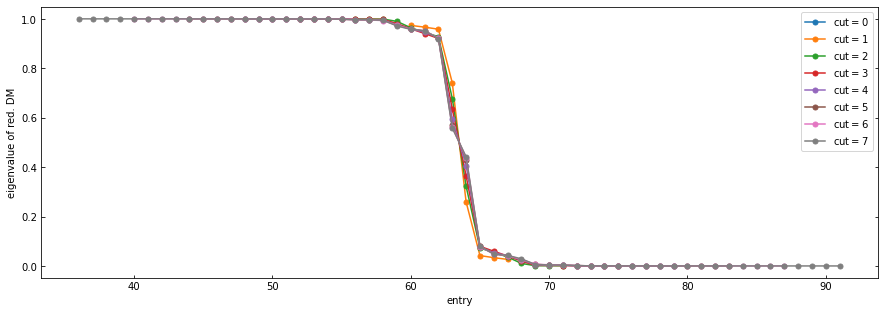

In [185]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]

ax.set_xlabel('entry')
ax.set_ylabel('eigenvalue of red. DM')

for time_cut in range(time_step//2):
    ax.plot( data_array5[time_cut,0,:], zero_to_nan(data_array5[time_cut,1,:]), label='cut'+r'$ = %d$' % time_cut, marker='o', alpha=1, ms=5)
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")